In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [2]:
df=pd.read_csv('Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [5]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [6]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [8]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [9]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [10]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [12]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [13]:
from sklearn.model_selection import train_test_split

In [18]:
# Splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
118,0.996529,0.333333,0.0,0.0,0.0,0.0
362,0.286053,0.566667,1.0,0.0,0.0,1.0
55,0.368887,0.533333,1.0,0.0,1.0,1.0
90,0.433640,0.966667,0.0,0.0,0.0,0.0
390,0.181294,0.566667,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
277,0.526354,0.366667,0.0,0.0,0.0,0.0
9,0.745424,0.133333,1.0,0.0,0.0,1.0
359,0.755866,0.366667,1.0,0.0,1.0,0.0
192,0.579181,0.333333,1.0,1.0,0.0,1.0


In [20]:
y_train

118    0.0
362    0.0
55     0.0
90     1.0
390    1.0
      ... 
277    1.0
9      1.0
359    1.0
192    1.0
559    1.0
Name: TaxInc_Good, Length: 480, dtype: float64

# Decision Tree model

# Building Decision Tree Classifier using Entropy Criteria

In [36]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

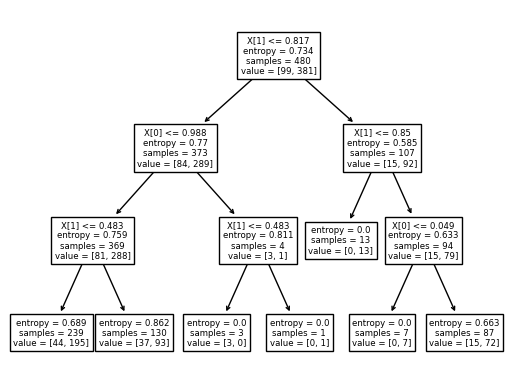

In [37]:
#PLot the decision tree
tree.plot_tree(model);


In [38]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [39]:
df.TaxInc_Good.value_counts() 

1    476
0    124
Name: TaxInc_Good, dtype: int64

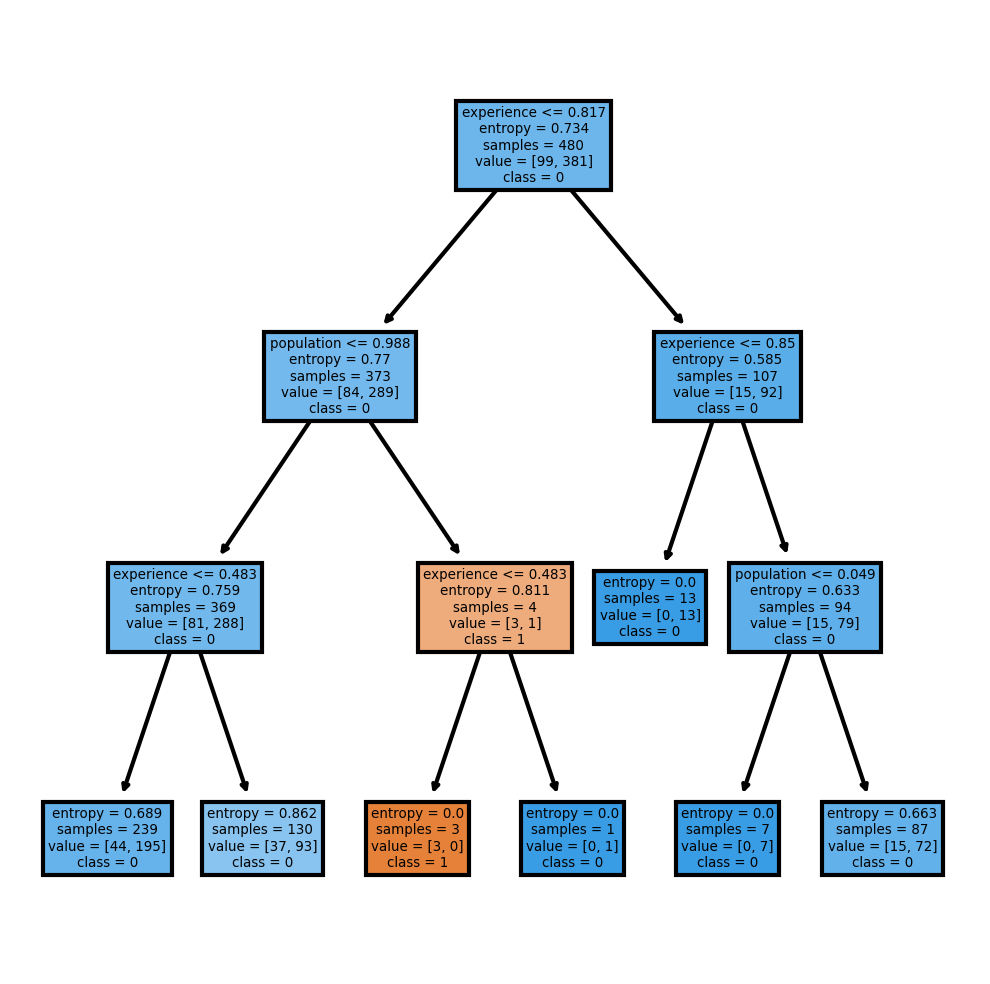

In [40]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [41]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_1 <= 0.82
|   |--- feature_0 <= 0.99
|   |   |--- feature_1 <= 0.48
|   |   |   |--- class: 1.0
|   |   |--- feature_1 >  0.48
|   |   |   |--- class: 1.0
|   |--- feature_0 >  0.99
|   |   |--- feature_1 <= 0.48
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.48
|   |   |   |--- class: 1.0
|--- feature_1 >  0.82
|   |--- feature_1 <= 0.85
|   |   |--- class: 1.0
|   |--- feature_1 >  0.85
|   |   |--- feature_0 <= 0.05
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.05
|   |   |   |--- class: 1.0



In [42]:
model.feature_importances_ 

array([0.30202956, 0.69797044, 0.        , 0.        , 0.        ,
       0.        ])

In [43]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

experience                0.69797
population                0.30203
Undergrad_YES             0.00000
Marital.Status_Married    0.00000
Marital.Status_Single     0.00000
Urban_YES                 0.00000
dtype: float64

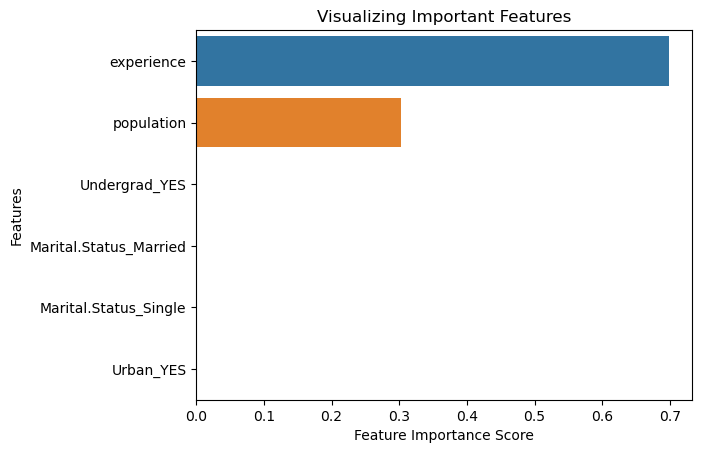

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [45]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1.0    119
0.0      1
dtype: int64

In [46]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [47]:
pd.crosstab(y_test,preds) 

col_0,0.0,1.0
TaxInc_Good,,
0.0,0,25
1.0,1,94


In [48]:
# Accuracy 
np.mean(preds==y_test)

0.7833333333333333

# Building Decision Tree Classifier (CART) using Gini Criteria

In [49]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [51]:
model_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [53]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==y_test) 

0.7833333333333333

In [54]:
model.feature_importances_ 

array([0.30202956, 0.69797044, 0.        , 0.        , 0.        ,
       0.        ])

# Decision Tree Regression Example

In [55]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [56]:
array = df.values
X = array[:,0:3] 
y = array[:,3] 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [58]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)    

DecisionTreeRegressor(max_depth=3)

In [59]:
#Find the testing accuracy
model.score(X_test,y_test)  

-0.16097830277791103

In [60]:
#Find the training accuracy
model.score(X_train, y_train)  

0.10721822011556403